In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Visualization of node data

In [42]:
def plot_data_nodes(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), 3, figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        data = pd.read_csv('data/{}/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,0].boxplot([data.loc[data.resistance == k, 'metric'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,0].set_xlabel('resistance (t)', fontsize=12)
        axs[i,1].set_title('Max levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,1].boxplot([data.loc[data.resistance == k, 'max_level'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,1].set_xlabel('resistance (t)', fontsize=12)
        axs[i,2].set_title('Avg levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,2].boxplot([data.loc[data.resistance == k, 'avg_level'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,2].set_xlabel('resistance (t)', fontsize=12)
        # delete from memory
        del data

    #plt.suptitle('Data visualization for n = {}, {}'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/stats_per_node_{}_{}_{}.jpeg'.format(thr, lab, n))

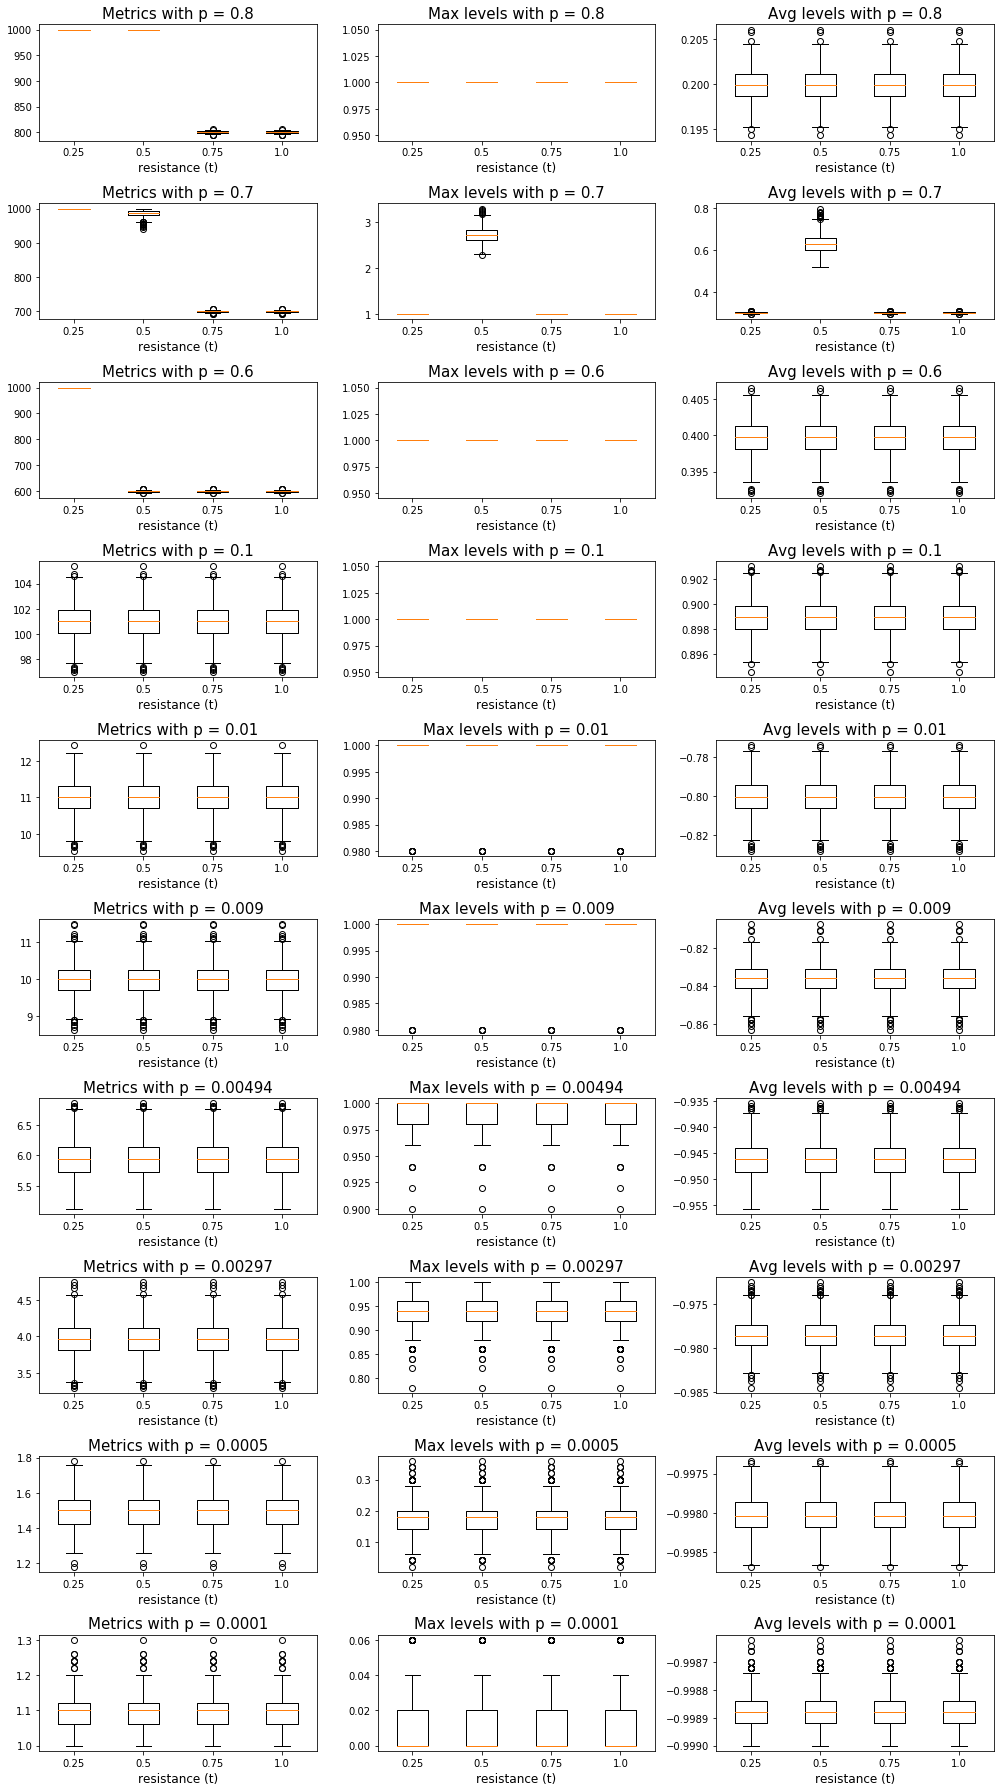

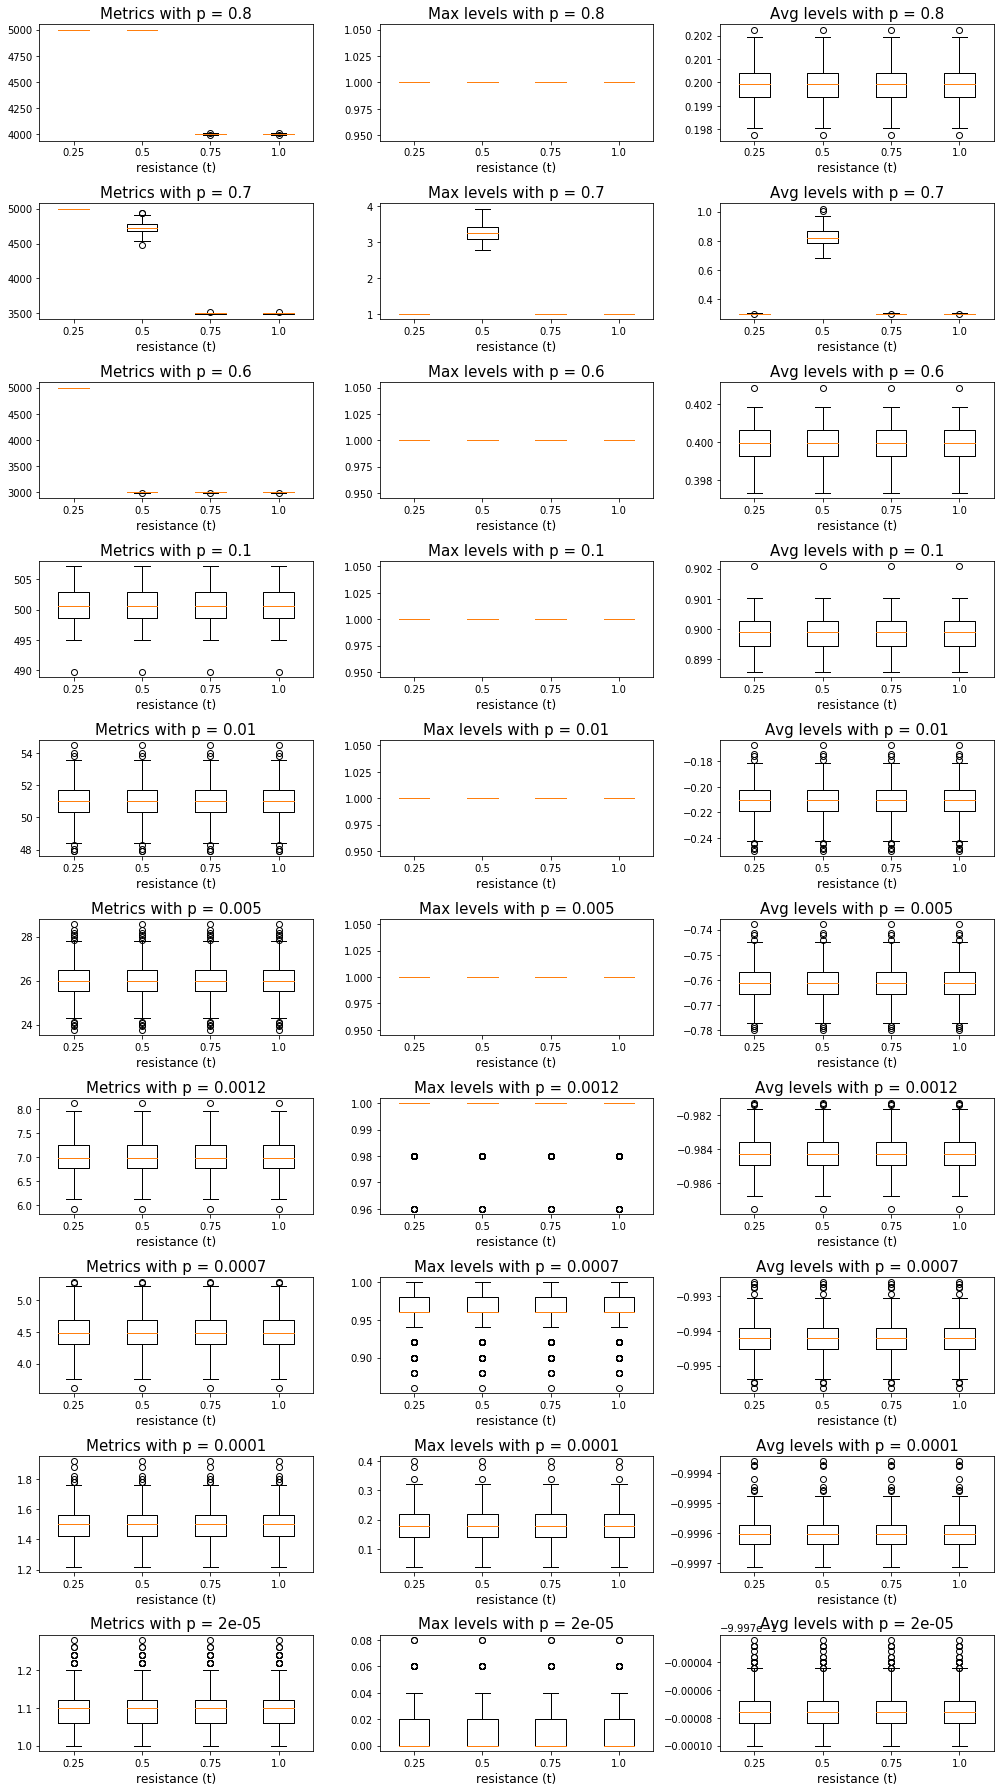

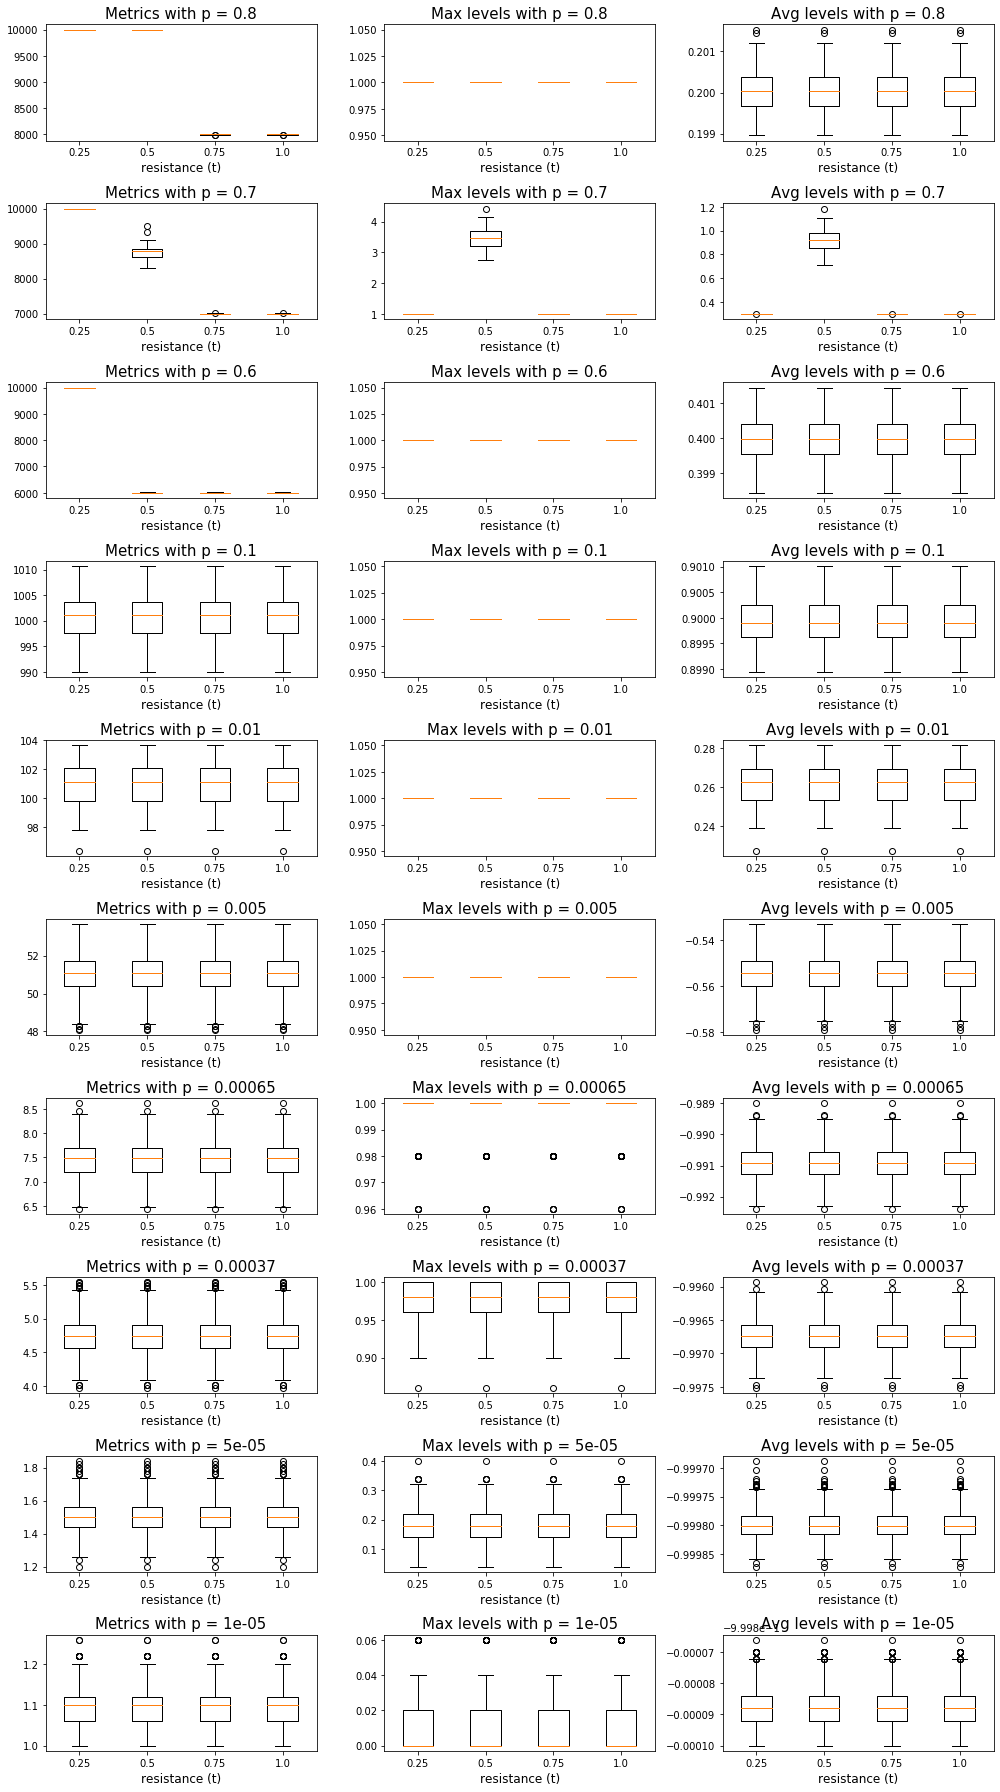

In [44]:
N = 10000
d = True
t = True

# reading resistances
res = np.load('data/res_phase1.npy')

for N in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    plot_data_nodes(prob, d, N, res, t)

## Visualization of graph data

In [62]:
def plot_data_graphs(prob, directed, n, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else: lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else: thr = 'pred'

    fig, axs = plt.subplots(len(prob), 3, figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        raw_data = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
        data = pd.read_csv('data/{}/data_graph_{}_{}_{}.csv'.format(thr, lab, n, p)).set_index('resistance')
        data_min = raw_data.groupby('resistance').min()[['metric', 'max_level', 'avg_level']]
        data_max = raw_data.groupby('resistance').max()[['metric', 'max_level', 'avg_level']]
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(p,4)), fontsize=15)
        data['metric'].transpose().plot(kind='line',ax=axs[i,0], color='m')
        axs[i,0].fill_between(data_min.index, data_min['metric'].values, data_max['metric'].values, alpha='0.2')
        
        axs[i,1].set_title('Max levels with p = {}'.format(round(p,4)), fontsize=15)
        data['max_level'].transpose().plot(kind='line',ax=axs[i,1], color='m')
        axs[i,1].fill_between(data_min.index, data_min['max_level'].values, data_max['max_level'].values, alpha='0.2')
        
        axs[i,2].set_title('Avg levels with p = {}'.format(round(p,4)), fontsize=15)
        data['avg_level'].transpose().plot(kind='line',ax=axs[i,2], color='m')
        axs[i,2].fill_between(data_min.index, data_min['avg_level'].values, data_max['avg_level'].values, alpha='0.2')
        
        # delete from memory
        del data, data_min, data_max

    #plt.suptitle('Data visualization for n = {}, {}'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/stats_per_gnp_{}_{}_{}.jpeg'.format(thr, lab, n), bbox_inches='tight')

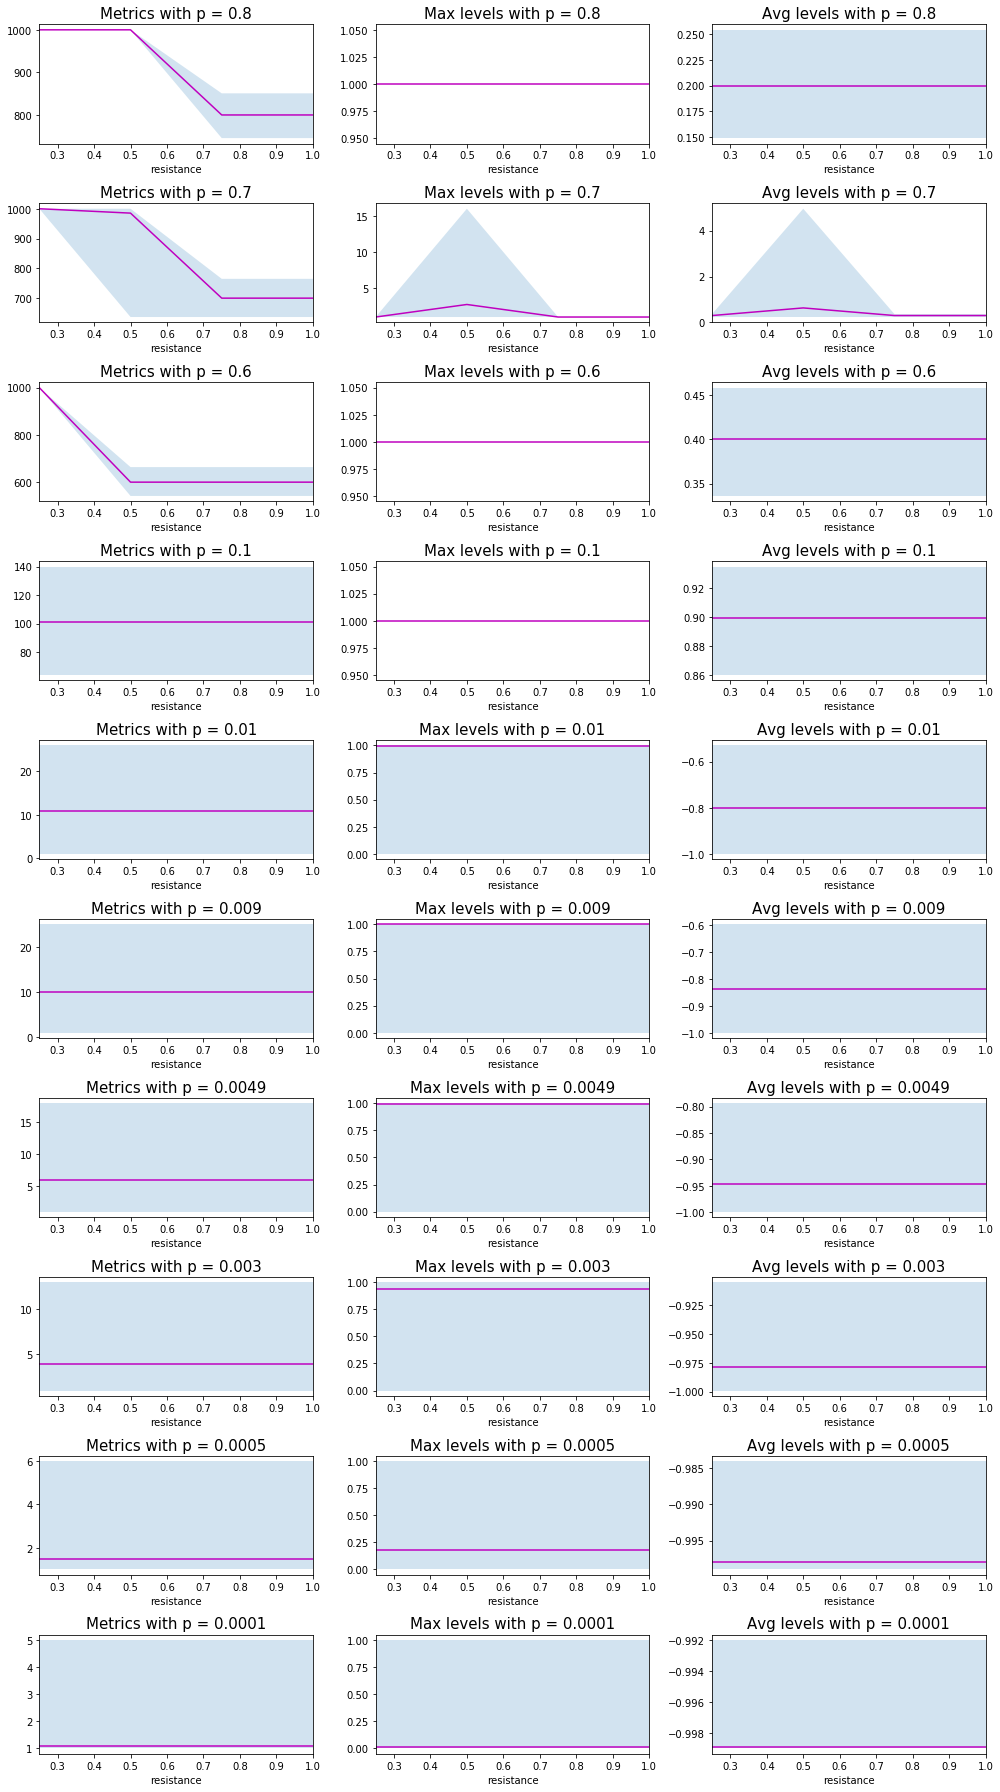

In [63]:
d = False
t = True
N = 1000

with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
plot_data_graphs(prob, d, N, t)

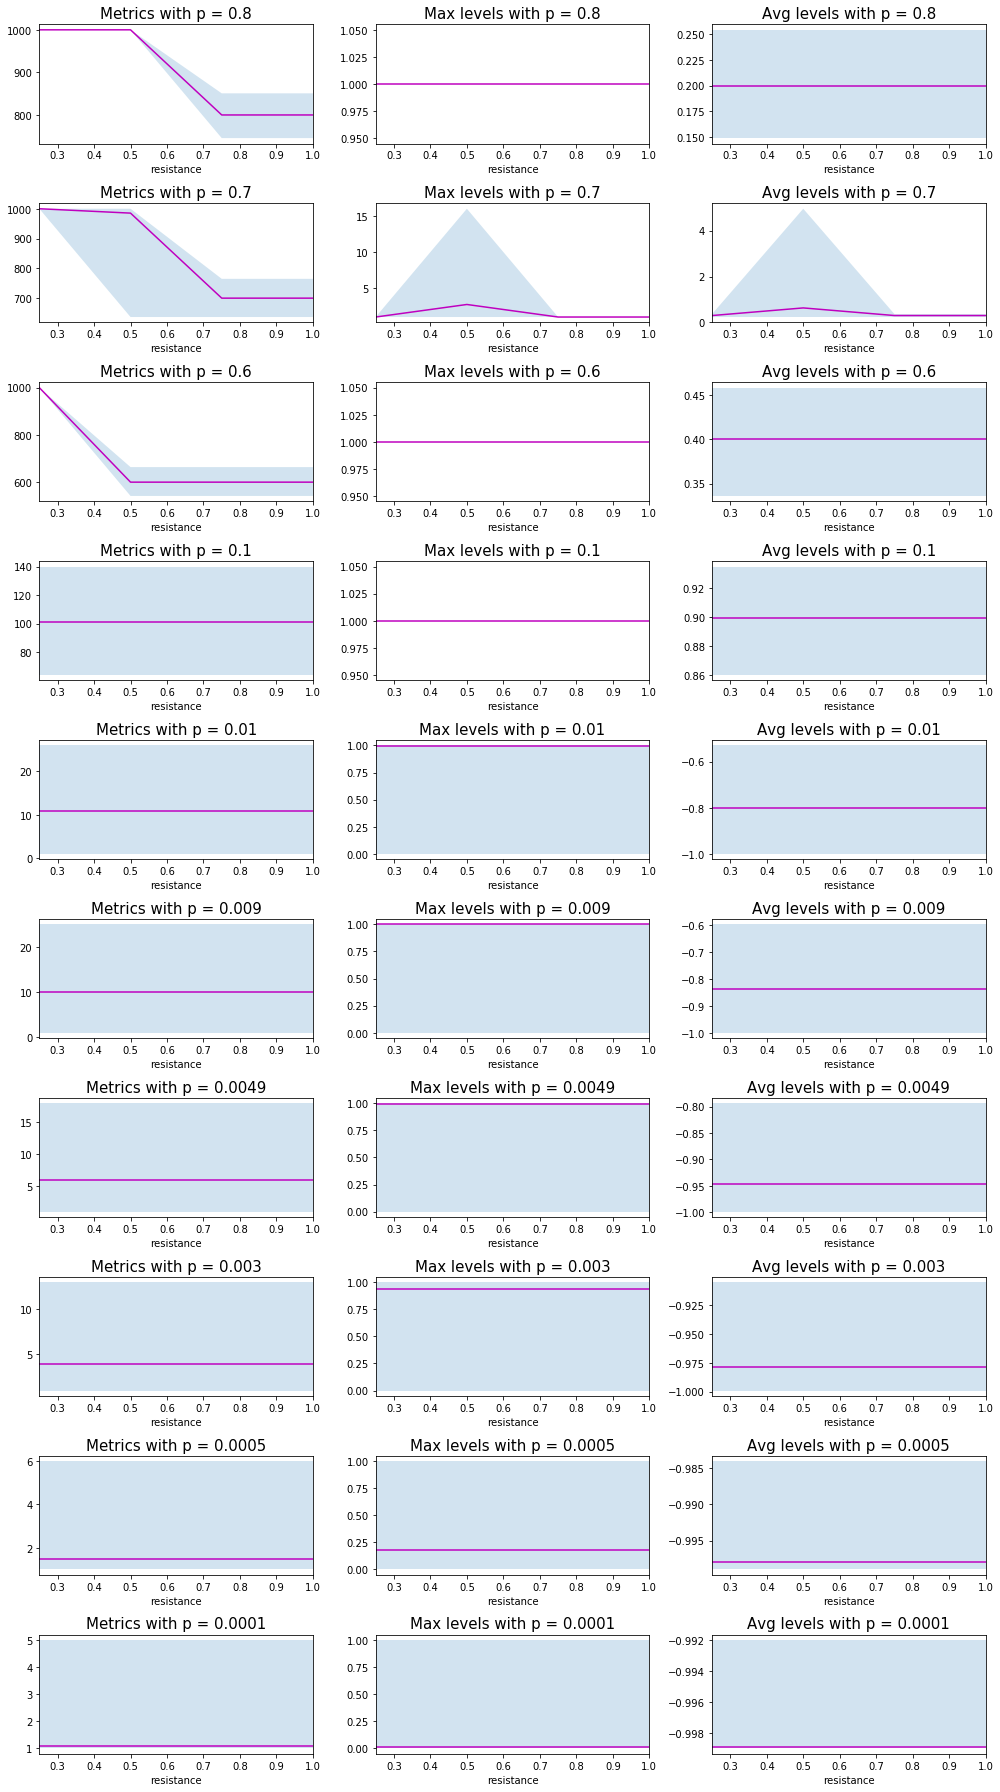

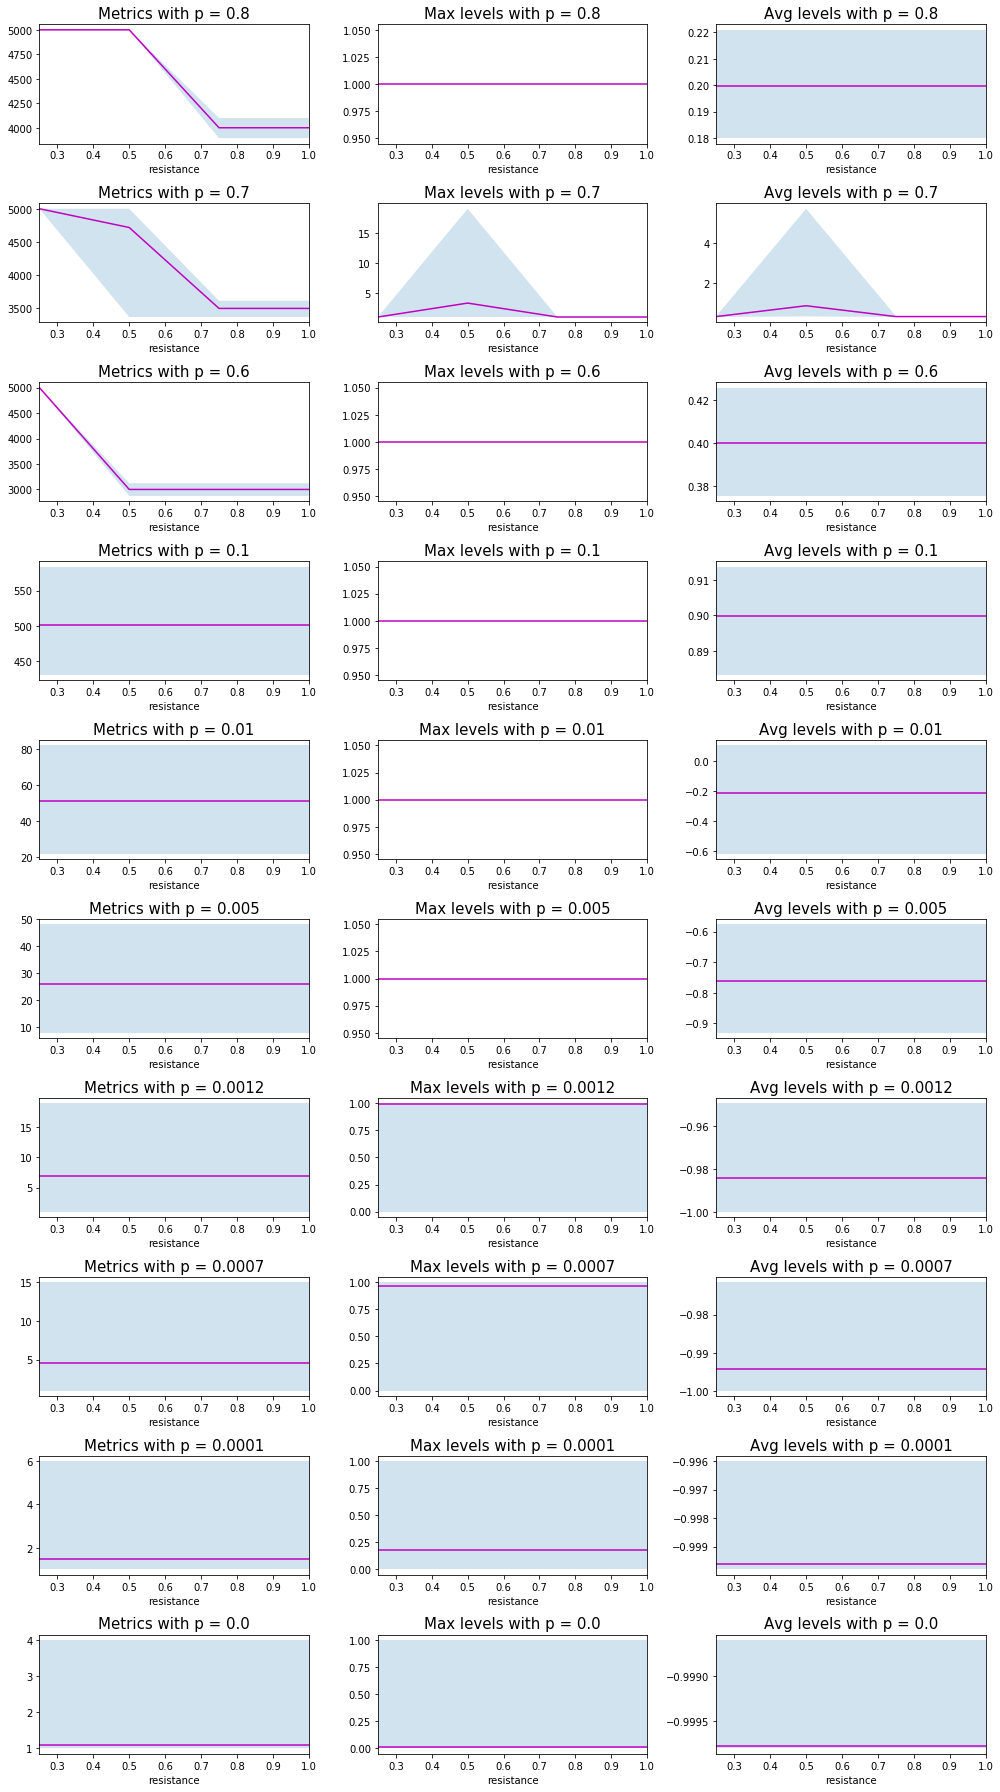

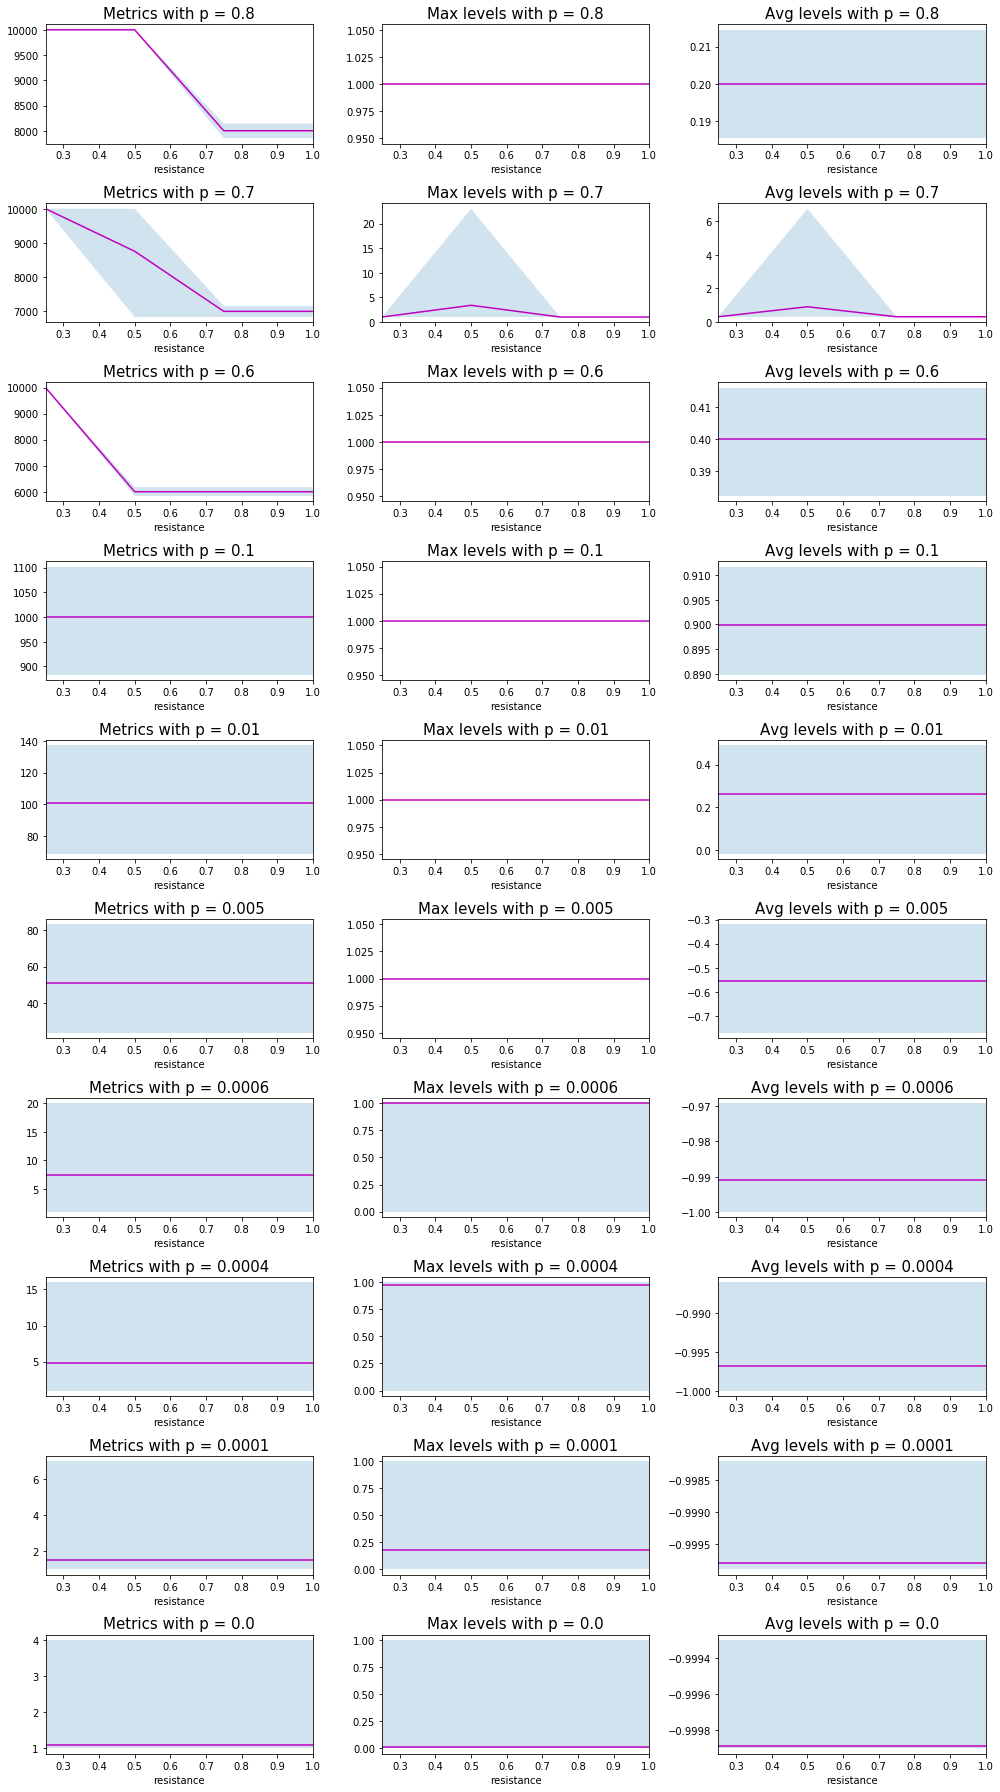

In [59]:
d = False
t = True
for n in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        prob = eval(f.read())
    plot_data_graphs(prob, d, n, t)